# Import Library

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [33]:
data = pd.read_csv('Data/BA_reviews.csv', encoding='latin-1')
data.head()

,Unnamed: 0,reviews
0,0,â Trip Verified | I take comfort in reading...
1,1,â Trip Verified | The worst journey in my l...
2,2,â Trip Verified | The airplanes and the loun...
3,3,â Trip Verified | One of the worst experienc...
4,4,â Trip Verified | Cancelled our flight last...


# EDA

In [34]:
data.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [36]:
# make a new column 'verified'
data['verified'] = data.reviews.str.contains("Trip Verified")
# Menampilkan DataFrame yang telah dipisahkan
print(data)


     Unnamed: 0                                            reviews  verified
0             0  â Trip Verified |  I take comfort in reading...      True
1             1  â Trip Verified |  The worst journey in my l...      True
2             2  â Trip Verified | The airplanes and the loun...      True
3             3  â Trip Verified | One of the worst experienc...      True
4             4  â Trip Verified |  Cancelled our flight last...      True
..          ...                                                ...       ...
995         995  â Trip Verified | \r\nI would like to compli...      True
996         996  â Trip Verified | Arrived at the airport to ...      True
997         997  â Trip Verified |  We have been loyal custom...      True
998         998  â Trip Verified |  Gatwick to Las Vegas. Boa...      True
999         999  Not Verified |  Nassau to London. Premium Econ...     False

[1000 rows x 3 columns]


In [37]:
data.verified.value_counts()

verified
True     791
False    209
Name: count, dtype: int64

In [38]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
data.head()

,reviews,verified
0,â Trip Verified | I take comfort in reading...,True
1,â Trip Verified | The worst journey in my l...,True
2,â Trip Verified | The airplanes and the loun...,True
3,â Trip Verified | One of the worst experienc...,True
4,â Trip Verified | Cancelled our flight last...,True


<Axes: xlabel='verified'>

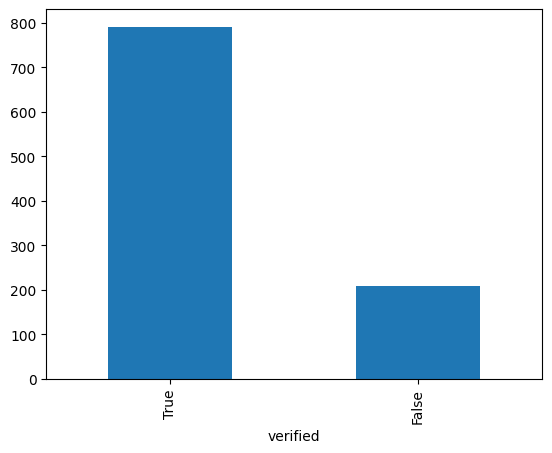

In [42]:
data.verified.value_counts().plot(kind='bar')

In [49]:
data['review_len'] = data.reviews.apply(len)

data.sort_values(by='review_len', ascending=False).head()

,reviews,verified,review_len
50,â Trip Verified | Terrible Experience with B...,True,3485
164,â Trip Verified | \r\nOur flight out to Dub...,True,3459
211,â Trip Verified | Probably the worst busines...,True,3429
169,â Trip Verified | The usual shambolic unfol...,True,3426
749,â Trip Verified | Hong Kong to Copenhagen v...,True,3402


# import Library for Cleaning

In [44]:
import re
import nltk

In [45]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
from collections import Counter

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Text Preprocessing

## Text Cleansing

In [50]:
# Defining a function to clean up the text

def clean_review(text):

    #replace all non-alphabetic character with a space
    sms = re.sub('[^a-zA-Z]', ' ', text)

    #converting to lowercase
    sms = sms.lower()

    #Splitting text (check the default of split func!)
    sms = sms.split()

    # Rejoingn text
    sms = ' '.join(sms)

    return sms

In [52]:
data['cleaned_review'] = data['reviews'].apply(clean_review)

# Lets have a look at a sample of texts after cleaning

print(*data['cleaned_review'][:10], sep="\n")

trip verified i take comfort in reading the last ten or so reviews to see i m not the only traveller to put in words how absolutely abysmal british airways are the only reason we are stuck using this awful airline is to use up points we booked club europe months ago london to athens sat in row and told they had run out of food options only choice was lentil pie or green curry returning athens to london club europe couldn t check in online as promised so arrived at the airport hrs early to be told they had overbooked the flight and basically we were being bumped to economy this airline fails to deliver time and time again it is a national disgrace and i implore everyone to choose an alternative
trip verified the worst journey in my life the connection time at lhr was only hour but the flight from mxp was on delay i had to rush to change terminal by train and arrived risking a heart attack after that the plane just stayed there for another minutes despite that upon arrival at sjc my bagg

## Text Tokenization

In [53]:
data["tokenized_review"] = data["cleaned_review"].apply(nltk.word_tokenize)

data.head()

,reviews,verified,review_len,cleaned_review,tokenized_review
0,â Trip Verified | I take comfort in reading...,True,727,trip verified i take comfort in reading the la...,"[trip, verified, i, take, comfort, in, reading..."
1,â Trip Verified | The worst journey in my l...,True,1077,trip verified the worst journey in my life the...,"[trip, verified, the, worst, journey, in, my, ..."
2,â Trip Verified | The airplanes and the loun...,True,342,trip verified the airplanes and the lounges ar...,"[trip, verified, the, airplanes, and, the, lou..."
3,â Trip Verified | One of the worst experienc...,True,1203,trip verified one of the worst experiences on ...,"[trip, verified, one, of, the, worst, experien..."
4,â Trip Verified | Cancelled our flight last...,True,881,trip verified cancelled our flight last minute...,"[trip, verified, cancelled, our, flight, last,..."


# Removing Stopwords

In [54]:
# Removing the stopwords function

def remove_stopwords(text):
    stop_word = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_word]
    return filtered_text

In [55]:
data["no_stopword_text"] = data["tokenized_review"].apply(remove_stopwords)

data.head()

,reviews,verified,review_len,cleaned_review,tokenized_review,no_stopword_text
0,â Trip Verified | I take comfort in reading...,True,727,trip verified i take comfort in reading the la...,"[trip, verified, i, take, comfort, in, reading...","[trip, verified, take, comfort, reading, last,..."
1,â Trip Verified | The worst journey in my l...,True,1077,trip verified the worst journey in my life the...,"[trip, verified, the, worst, journey, in, my, ...","[trip, verified, worst, journey, life, connect..."
2,â Trip Verified | The airplanes and the loun...,True,342,trip verified the airplanes and the lounges ar...,"[trip, verified, the, airplanes, and, the, lou...","[trip, verified, airplanes, lounges, worn, old..."
3,â Trip Verified | One of the worst experienc...,True,1203,trip verified one of the worst experiences on ...,"[trip, verified, one, of, the, worst, experien...","[trip, verified, one, worst, experiences, wors..."
4,â Trip Verified | Cancelled our flight last...,True,881,trip verified cancelled our flight last minute...,"[trip, verified, cancelled, our, flight, last,...","[trip, verified, cancelled, flight, last, minu..."


## Lemmatization

In [56]:
lemmatizer = WordNetLemmatizer()

# lemmatize string function

def lemmatize_word(text):
    #provice context i.e. part-of-speech (pos)
    # v = verb
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]

    return lemmas

In [57]:
data['lemmatize_word'] = data['no_stopword_text'].apply(lemmatize_word)
# Membuat kolom 'lemmatize_word' dengan menerapkan fungsi lemmatize_word pada kolom 'text'

data.head()

,reviews,verified,review_len,cleaned_review,tokenized_review,no_stopword_text,lemmatize_word
0,â Trip Verified | I take comfort in reading...,True,727,trip verified i take comfort in reading the la...,"[trip, verified, i, take, comfort, in, reading...","[trip, verified, take, comfort, reading, last,...","[trip, verify, take, comfort, read, last, ten,..."
1,â Trip Verified | The worst journey in my l...,True,1077,trip verified the worst journey in my life the...,"[trip, verified, the, worst, journey, in, my, ...","[trip, verified, worst, journey, life, connect...","[trip, verify, worst, journey, life, connectio..."
2,â Trip Verified | The airplanes and the loun...,True,342,trip verified the airplanes and the lounges ar...,"[trip, verified, the, airplanes, and, the, lou...","[trip, verified, airplanes, lounges, worn, old...","[trip, verify, airplanes, lounge, wear, old, b..."
3,â Trip Verified | One of the worst experienc...,True,1203,trip verified one of the worst experiences on ...,"[trip, verified, one, of, the, worst, experien...","[trip, verified, one, worst, experiences, wors...","[trip, verify, one, worst, experience, worst, ..."
4,â Trip Verified | Cancelled our flight last...,True,881,trip verified cancelled our flight last minute...,"[trip, verified, cancelled, our, flight, last,...","[trip, verified, cancelled, flight, last, minu...","[trip, verify, cancel, flight, last, minute, m..."


# Vectorization

## Corpus Text

In [58]:
# creating Corpus Text to encode furher into vectorize form

corpus = []
for i in data["lemmatize_word"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

print("The first 10 lines in corpus : \n")
print(*corpus[:10], sep="\n")

The first 10 lines in corpus : 

trip verify take comfort read last ten review see traveller put word absolutely abysmal british airways reason stick use awful airline use point book club europe months ago london athens sit row tell run food options choice lentil pie green curry return athens london club europe check online promise arrive airport hrs early tell overbooked flight basically bump economy airline fail deliver time time national disgrace implore everyone choose alternative
trip verify worst journey life connection time lhr hour flight mxp delay rush change terminal train arrive risk heart attack plane stay another minutes despite upon arrival sjc baggage lose fill form give employee give receipt reference number ba phone number sjc simply never answer call twice toll free number realize record delivery address enter online deal shitty website deliver baggage three days later claim compensation online buy clothe stuff never get receipt expect upgrade flight back mxp nothing 

In [74]:
# Tokenisasi teks menjadi kata-kata
tokens = ' '.join(corpus).split()

# Hitung frekuensi kata
word_freq = Counter(tokens)

# Ubah hasil perhitungan ke dalam DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Kata', 'Frekuensi'])

# Sort DataFrame berdasarkan frekuensi kata
word_freq_df = word_freq_df.sort_values(by='Frekuensi', ascending=False)

# Tampilkan DataFrame dengan frekuensi kata
print(word_freq_df)

            Kata  Frekuensi
49        flight       2147
94            ba       1179
1         verify       1008
149         seat        992
0           trip        923
...          ...        ...
3567      spring          1
3568      midday          1
3569  supposedly          1
3571    oxymoron          1
5558       obese          1

[5559 rows x 2 columns]


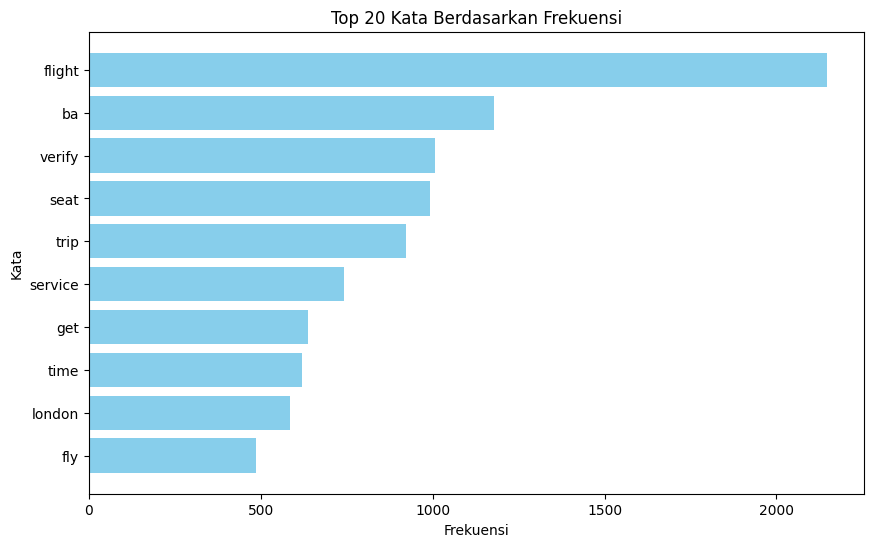

In [76]:
top_words = word_freq_df.head(10)

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_words['Kata'], top_words['Frekuensi'], color='skyblue')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Top 20 Kata Berdasarkan Frekuensi')
plt.gca().invert_yaxis()  # Membalik urutan agar kata teratas ada di atas
plt.show()

In [77]:
# Fungsi untuk membuat n-grams dari teks
def generate_ngrams(text, n):
    words = text.split()
    n_grams = ngrams(words, n)
    return [' '.join(gram) for gram in n_grams]

# Contoh membuat bigram (n=2) dari teks dalam corpus
n = 2  # Ganti dengan nilai n sesuai dengan jenis n-grams yang Anda inginkan (misalnya, 2 untuk bigram)
ngram_corpus = [generate_ngrams(text, n) for text in corpus]

# Tampilkan contoh hasil bigram
print("Contoh Bigram:")
for i, bigram in enumerate(ngram_corpus[0][:10]):
    print(f"{i + 1}: {bigram}")


Contoh Bigram:
1: trip verify
2: verify take
3: take comfort
4: comfort read
5: read last
6: last ten
7: ten review
8: review see
9: see traveller
10: traveller put


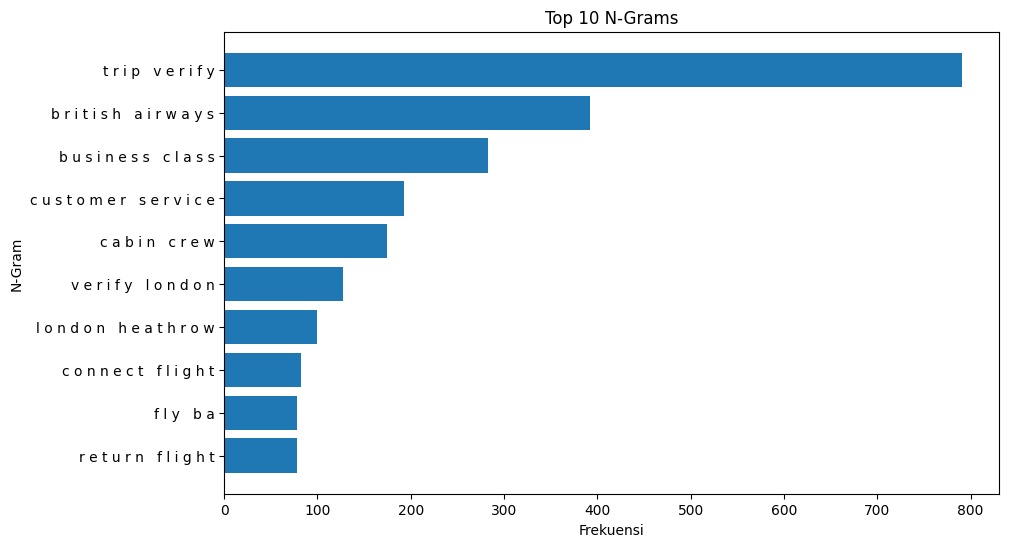

In [78]:
# Menggabungkan semua n-grams menjadi satu list
all_ngrams = [' '.join(ngram) for ngram_list in ngram_corpus for ngram in ngram_list]

# Menghitung frekuensi n-grams
ngram_freq = Counter(all_ngrams)

# Mengambil 10 n-grams teratas
top_ngrams = ngram_freq.most_common(10)

# Membagi n-grams dan frekuensinya
ngrams, freq = zip(*top_ngrams)

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.barh(ngrams, freq)
plt.xlabel('Frekuensi')
plt.ylabel('N-Gram')
plt.title('Top 10 N-Grams')
plt.gca().invert_yaxis()  # Membalik urutan agar n-grams teratas di bagian atas
plt.show()

# Sentimen Analyst

## Text Clustering

In [79]:
categories = ['negative', 'positive']
num_cat = len(categories)
num_cat

2

In [81]:
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Converting the corpus in vector form

In [82]:
# Changing text data in to number

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

# Let's have a look at our feature
X.dtype

dtype('float64')

In [83]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Clustering reviews with K-Means Methonds

In [85]:
from sklearn.cluster import KMeans
n_clusters = 2  # Ganti dengan jumlah kluster yang sesuai

# Buat objek K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit model K-Means ke data vektor teks
kmeans.fit(X)  # vectors adalah matriks vektor teks


c:\Users\ASUS\.virtualenvs\Deployment2-A3cDa8YU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [94]:
data['labels'] = kmeans.labels_
data.head()

,reviews,verified,review_len,cleaned_review,tokenized_review,no_stopword_text,lemmatize_word,labels
0,â Trip Verified | I take comfort in reading...,True,727,trip verified i take comfort in reading the la...,"[trip, verified, i, take, comfort, in, reading...","[trip, verified, take, comfort, reading, last,...","[trip, verify, take, comfort, read, last, ten,...",1
1,â Trip Verified | The worst journey in my l...,True,1077,trip verified the worst journey in my life the...,"[trip, verified, the, worst, journey, in, my, ...","[trip, verified, worst, journey, life, connect...","[trip, verify, worst, journey, life, connectio...",1
2,â Trip Verified | The airplanes and the loun...,True,342,trip verified the airplanes and the lounges ar...,"[trip, verified, the, airplanes, and, the, lou...","[trip, verified, airplanes, lounges, worn, old...","[trip, verify, airplanes, lounge, wear, old, b...",0
3,â Trip Verified | One of the worst experienc...,True,1203,trip verified one of the worst experiences on ...,"[trip, verified, one, of, the, worst, experien...","[trip, verified, one, worst, experiences, wors...","[trip, verify, one, worst, experience, worst, ...",1
4,â Trip Verified | Cancelled our flight last...,True,881,trip verified cancelled our flight last minute...,"[trip, verified, cancelled, our, flight, last,...","[trip, verified, cancelled, flight, last, minu...","[trip, verify, cancel, flight, last, minute, m...",1


<Axes: xlabel='labels'>

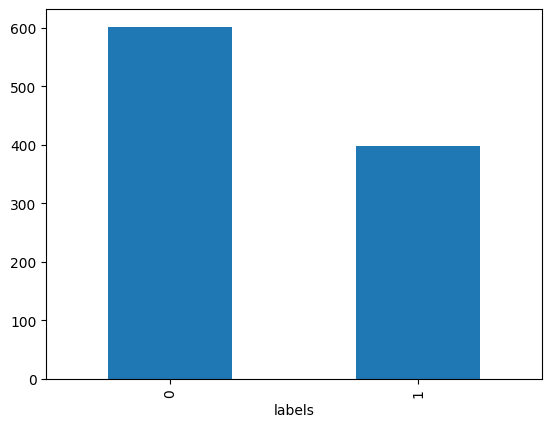

In [102]:
data.labels.value_counts().plot(kind='bar')

# Label Encoder

In [104]:
# Make a label for target as y

le = LabelEncoder()
data['labels'] = le.fit_transform(data['labels'])

In [105]:
data.head()

,reviews,verified,review_len,cleaned_review,tokenized_review,no_stopword_text,lemmatize_word,labels
0,â Trip Verified | I take comfort in reading...,True,727,trip verified i take comfort in reading the la...,"[trip, verified, i, take, comfort, in, reading...","[trip, verified, take, comfort, reading, last,...","[trip, verify, take, comfort, read, last, ten,...",1
1,â Trip Verified | The worst journey in my l...,True,1077,trip verified the worst journey in my life the...,"[trip, verified, the, worst, journey, in, my, ...","[trip, verified, worst, journey, life, connect...","[trip, verify, worst, journey, life, connectio...",1
2,â Trip Verified | The airplanes and the loun...,True,342,trip verified the airplanes and the lounges ar...,"[trip, verified, the, airplanes, and, the, lou...","[trip, verified, airplanes, lounges, worn, old...","[trip, verify, airplanes, lounge, wear, old, b...",0
3,â Trip Verified | One of the worst experienc...,True,1203,trip verified one of the worst experiences on ...,"[trip, verified, one, of, the, worst, experien...","[trip, verified, one, worst, experiences, wors...","[trip, verify, one, worst, experience, worst, ...",1
4,â Trip Verified | Cancelled our flight last...,True,881,trip verified cancelled our flight last minute...,"[trip, verified, cancelled, our, flight, last,...","[trip, verified, cancelled, flight, last, minu...","[trip, verify, cancel, flight, last, minute, m...",1


Label change as otomaticly be 0 and 1
0 = negative  <br>
1 = positive

# Download Data

In [109]:
Cleaned_review = ['reviews', 'verified', 'labels']
print(data[Cleaned_review])

                                               reviews  verified  labels
0    â Trip Verified |  I take comfort in reading...      True       1
1    â Trip Verified |  The worst journey in my l...      True       1
2    â Trip Verified | The airplanes and the loun...      True       0
3    â Trip Verified | One of the worst experienc...      True       1
4    â Trip Verified |  Cancelled our flight last...      True       1
..                                                 ...       ...     ...
995  â Trip Verified | \r\nI would like to compli...      True       0
996  â Trip Verified | Arrived at the airport to ...      True       1
997  â Trip Verified |  We have been loyal custom...      True       1
998  â Trip Verified |  Gatwick to Las Vegas. Boa...      True       0
999  Not Verified |  Nassau to London. Premium Econ...     False       0

[1000 rows x 3 columns]


In [110]:
data[Cleaned_review].to_csv("data/Cleaned_reviews.csv")

In [114]:
center = kmeans.cluster_centers_
center

array([[ 1.36054378e-03,  1.63815951e-04, -3.79470760e-19, ...,
         9.48676901e-20,  1.71517113e-03,  9.48676901e-20],
       [ 6.20585213e-04,  1.37284323e-03,  3.03137753e-04, ...,
         1.58222301e-04,  1.01720122e-03,  1.58222301e-04]])